In [ ]:
#pip install statsmodels

In [3]:
# Import libraries 
import pandas as pd
import numpy as np
#Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller 

In [4]:
# Visualization 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth',400)

sns.set(context='notebook',style='whitegrid', rc={"figure.figsize":(18,4)})

In [5]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,4

In [7]:
# Get rid of the unnecessary statsmodel package warnings
import warnings 
warnings.filterwarnings("ignore")

In [8]:
# Setting random seed for notebook reproducibility 
rnd_seed = 42 
np.random.seed=rnd_seed
np.random.set_state=rnd_seed

In [9]:
df = pd.read_csv("/Users/bg/Desktop/Data_Analyst /Combined 14-1048 Sales 23.24.csv")
df

,Cat No,Date,Sales
0,14-1048,1/1/23,115
1,14-1048,2/1/23,137
2,14-1048,3/3/23,137
3,14-1048,4/1/23,134
4,14-1048,5/1/23,134
5,14-1048,6/1/23,167
6,14-1048,7/1/23,105
7,14-1048,8/1/23,129
8,14-1048,9/1/23,124
9,14-1048,10/1/23,139


In [10]:
# Change the ds column to datetime for prophet
#df["Date"]=pd.to_datetime(df['Date'])
df['Date']=pd.DatetimeIndex(df['Date'])
df.set_index(keys=['Date'], drop=True, inplace=True)
df.dtypes

Cat No    object
Sales      int64
dtype: object

In [11]:
df

,Cat No,Sales
Date,,
2023-01-01,14-1048,115
2023-02-01,14-1048,137
2023-03-03,14-1048,137
2023-04-01,14-1048,134
2023-05-01,14-1048,134
2023-06-01,14-1048,167
2023-07-01,14-1048,105
2023-08-01,14-1048,129
2023-09-01,14-1048,124


In [12]:
#Check for missing values or data
df[pd.isnull(df['Sales'])]

,Cat No,Sales
Date,,


In [13]:
df_new = df.drop(columns='Cat No')
#df_new.sort_index(inplace=True)
df_new

,Sales
Date,
2023-01-01,115
2023-02-01,137
2023-03-03,137
2023-04-01,134
2023-05-01,134
2023-06-01,167
2023-07-01,105
2023-08-01,129
2023-09-01,124


<Axes: xlabel='Date'>

Text(0.5, 1.0, 'Cut and Run Sales')

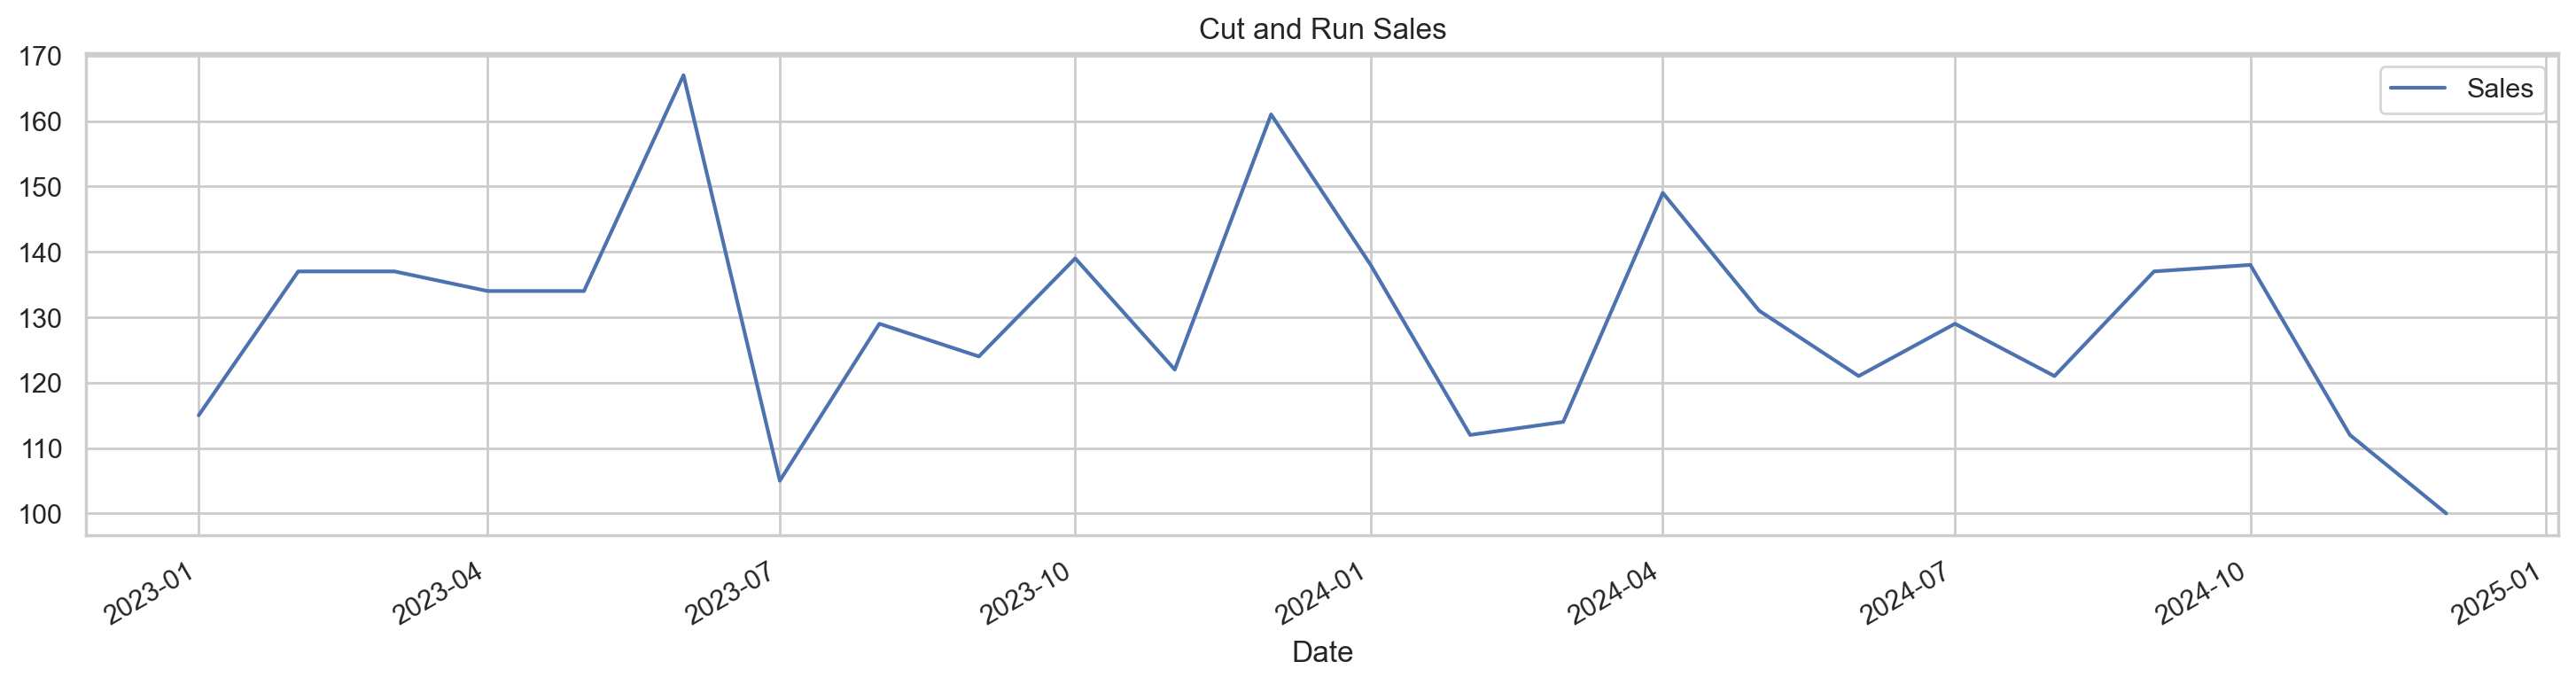

In [14]:
# Plot and Visualize the data
df_new.plot()
plt.title("Cut and Run Sales")

In [15]:
idx= pd.date_range(start='2023-01-01', end='2024-12-01', periods =12)
pd.infer_freq(idx)

In [16]:
#Stats Model Decomposition 
# X: array like, Time Series. x mkust conatin 2 complete cycles.
#Model(opyional): Type of seasonal component. {Additive, Multiplicative}
#filt(optional): array like filter coeeficients for filtering out the seasonal component. 
#Period(optional):int, Period of series(eg 1 for annual, 4 quarterly, etc). Must be used if x is not a pandas object or if the index of x does not have a frequency. 
#Two_sided(optional): bool, the moving average method used in filtering. If True(default), centered moving averagecomputed using filt. If false filt coeeficients are for past values only.
#Extrapolate_trend(optional): int, if set to>0 trend resulting from nthe convolution is linear least-squares extrapolated on both ends.

#statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0
# Additive Model = trend more linear and the seasonality and trend components are constant over time. 
#Multiplicative increasing or decreasing at a non-linear rate

In [17]:
# Decomposition time series breaks the time series down into several components trend, seasonal,residual components
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(df_new, period = 4, model='multiplicative')

Text(0.5, 0.98, 'Decomposition of additive time series ')

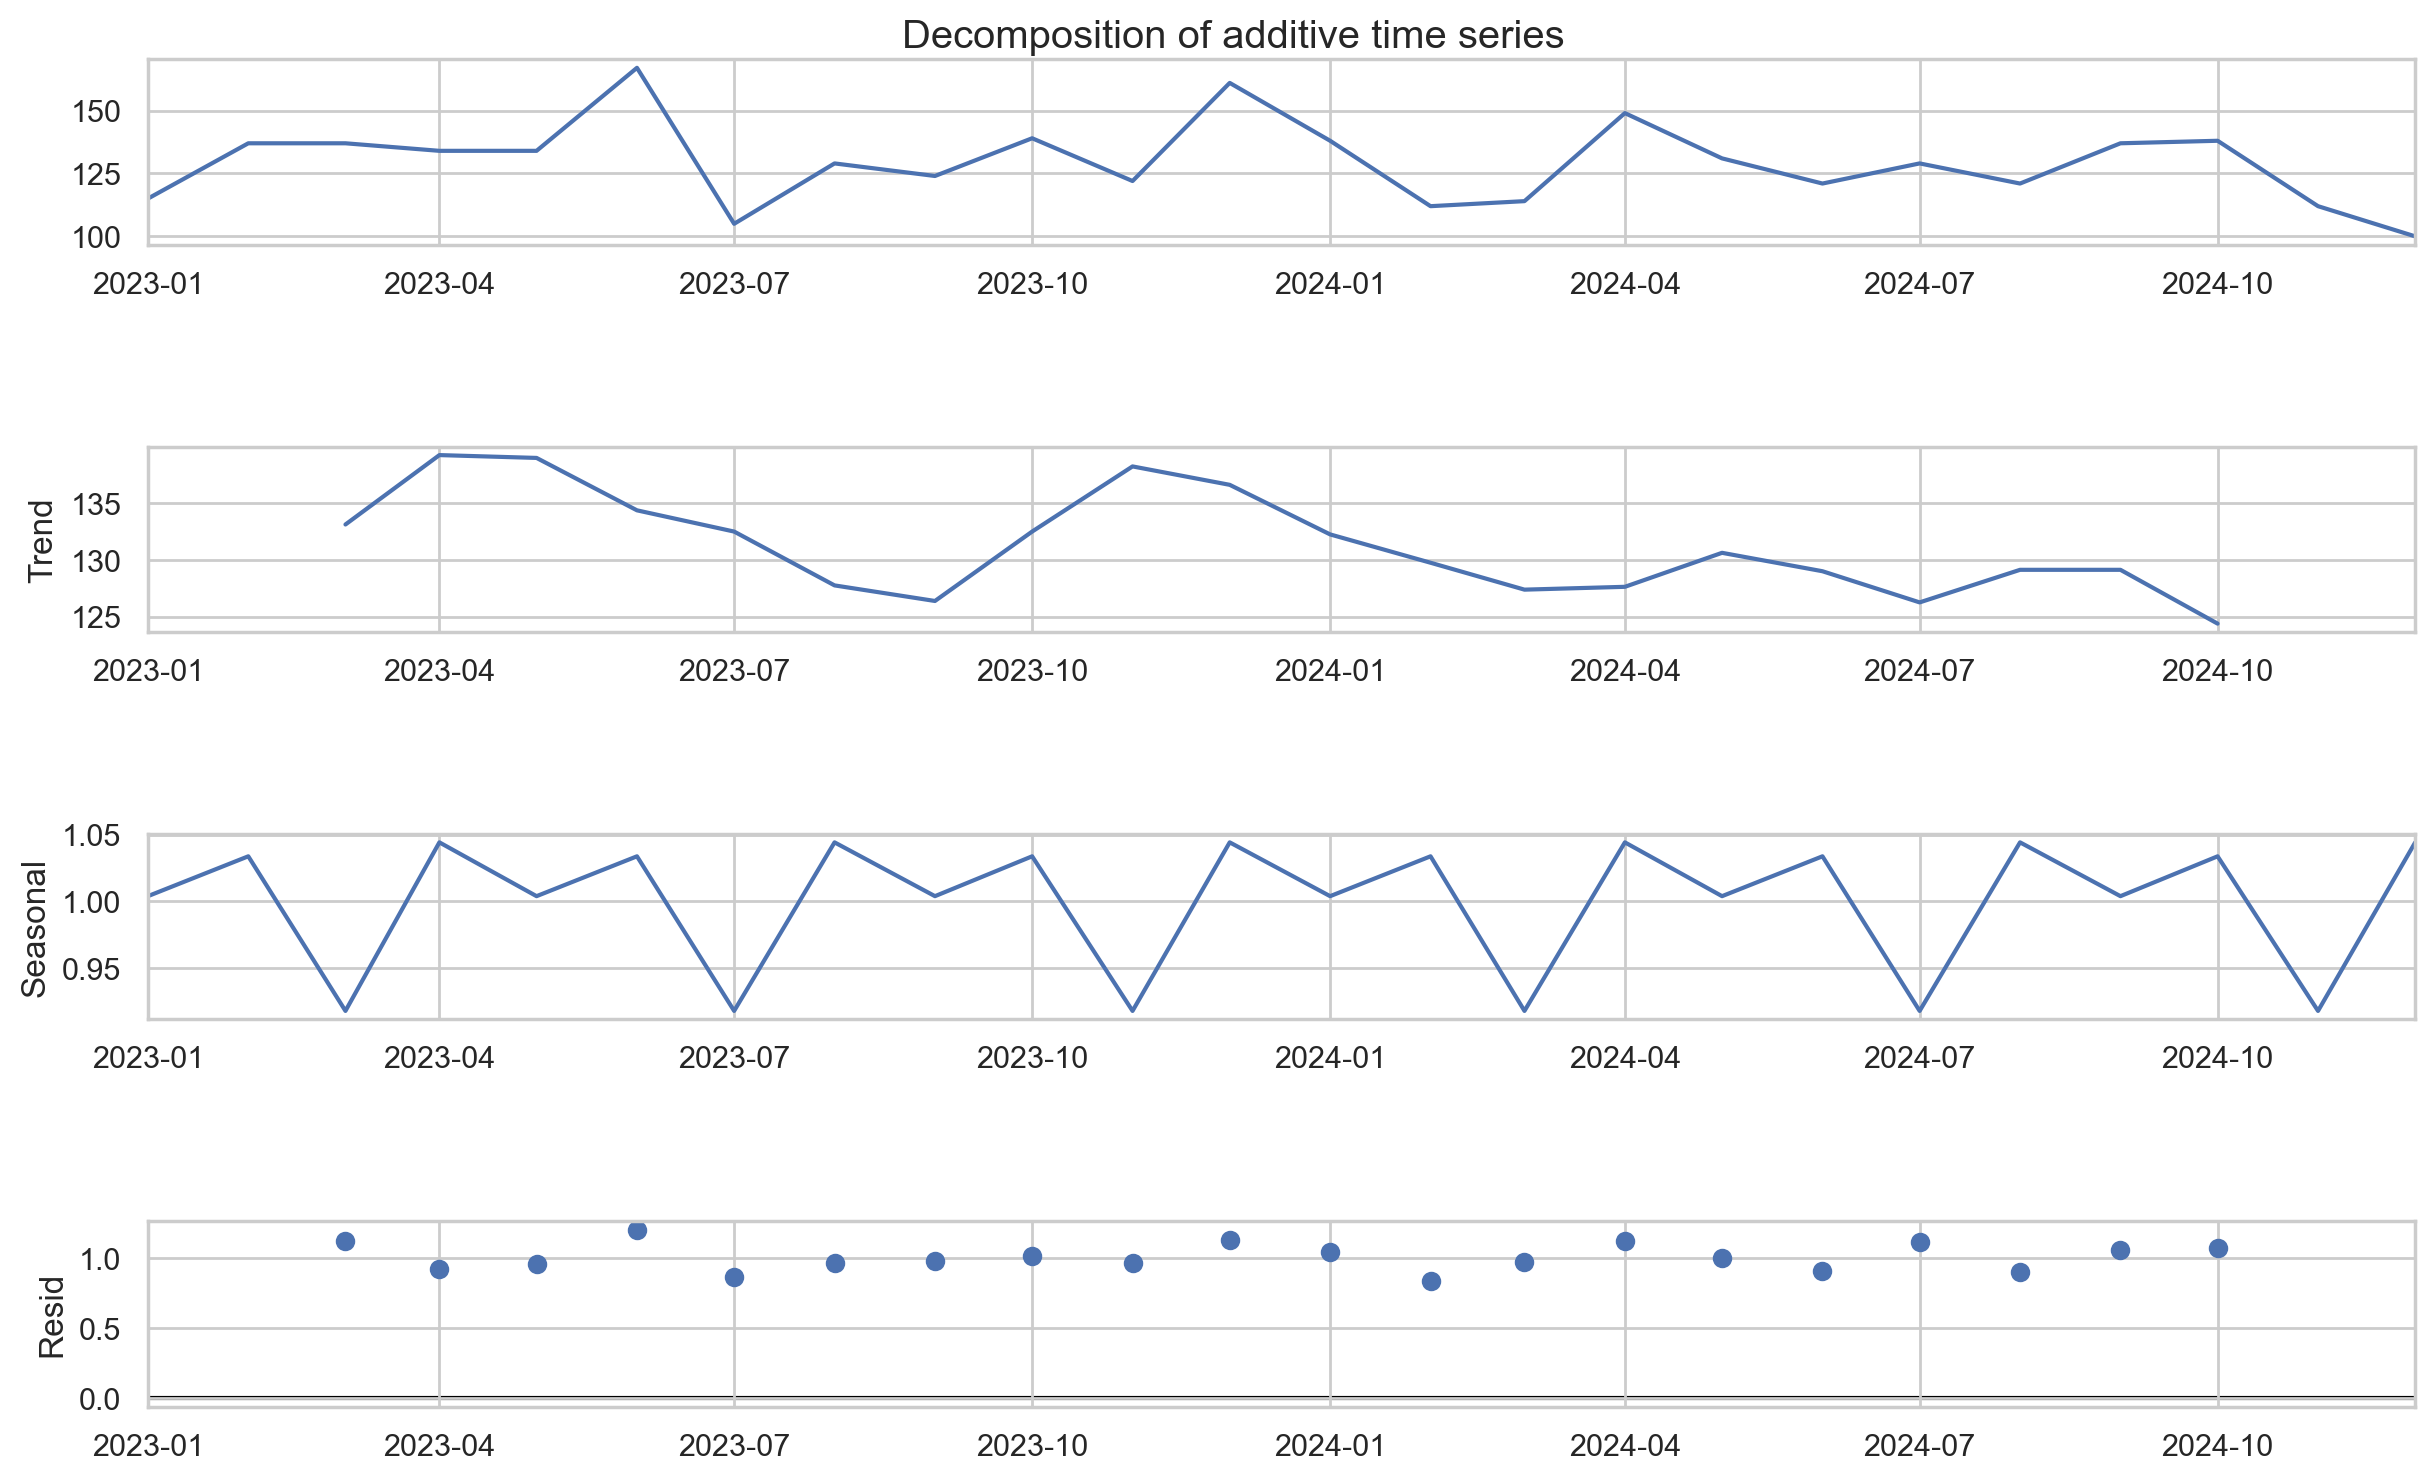

In [18]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series ')

In [19]:
#pip install pmdarima

In [20]:
from pmdarima.arima import auto_arima

In [55]:
stepwise_model = auto_arima(df_new, start_p=1,start_q=1, 
                            max_p=3, max_q=3, m=12, 
                            stat_P=0, seasonal = True,
                           d=1, D=1, trace=True, 
                           error_action = 'ignore',
                           suppress_warnings=True,
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=114.458, Time=1.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=112.736, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=114.727, Time=0.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=116.717, Time=0.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=112.606, Time=0.07 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=115.869, Time=1.05 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=112.729, Time=0.12 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=114.077, Time=0.42

In [34]:
stepwise_model.aic()

112.60612290443132

In [56]:
train = df_new.loc['2023-01-01':'2024-6-01']

In [57]:
train.tail()

,Sales
Date,
2024-02-01,112
2024-03-01,114
2024-04-01,149
2024-05-01,131
2024-06-01,121


In [58]:
test = df_new.loc['2024-01-01':]

In [59]:
test.head()

,Sales
Date,
2024-01-01,138
2024-02-01,112
2024-03-01,114
2024-04-01,149
2024-05-01,131


In [60]:
#Train the model 
len(train), len(test)

(18, 12)

In [61]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [62]:
# Fit a fresh ARIMA model
stepwise_model = auto_arima(train, seasonal=True, stepwise=True)

# Make predictions
test_predictions = stepwise_model.predict(n_periods=12)

In [63]:
test_predictions

18    131.611111
19    131.611111
20    131.611111
21    131.611111
22    131.611111
23    131.611111
24    131.611111
25    131.611111
26    131.611111
27    131.611111
28    131.611111
29    131.611111
dtype: float64

In [64]:
test_predictions = pd.DataFrame(test_predictions, index = test.index, columns=['Prediction'])

In [65]:
test_predictions

,Prediction
Date,
2024-01-01,NaN
2024-02-01,NaN
2024-03-01,NaN
2024-04-01,NaN
2024-05-01,NaN
2024-06-01,NaN
2024-07-01,NaN
2024-08-01,NaN
2024-09-01,NaN


In [ ]:
# Check for NaN values 
# Check for NaN or Infinite values in training data
print(stepwise_model.arima_res_.model.endog)  # This prints the training data used by the model

# Identify problematic values
if np.isnan(stepwise_model.arima_res_.model.endog).any():
    print("Warning: Training data contains NaN values!")

if np.isinf(stepwise_model.arima_res_.model.endog).any():
    print("Warning: Training data contains infinite values!")

In [ ]:
print("Max value in training data:", np.max(stepwise_model.arima_res_.model.endog))
print("Min value in training data:", np.min(stepwise_model.arima_res_.model.endog))

In [ ]:
print("Number of observations used for training:", len(stepwise_model.arima_res_.model.endog))